---

# Train, Test and Evaluate a Regression Model 

---

#### Don't forget to fill out your notebook and send it at the end of the session to Nourhene.Ben-Rabah@univ-paris1.fr


# Dataset 
In this notebook, we will use the **steel industry energy consumption dataset**. This is one of the most recently published datasets that integrates energy consumption data collected using several IoT devices from a small smart steel industry in South Korea. The steel industry produces several types of coils, steel plates and iron plates. 



# Define task 
The task is to make prediction about the energy consumption of the steel industry from a set of metrics. The Usage_kWh is the target variable that ML models must predict.

# Information About Dataset


In [42]:
import pandas as pnd
df_steel = pnd.read_csv("Steel_industry_data.csv")
df_steel = df_steel.set_index('date')
df_steel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35040 entries, 01/01/2018 00:15 to 31/12/2018 00:00
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.9+ MB


In [2]:
df_steel.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


# Data transformation 
 Define the DataFrame index using the date column 

In [30]:
df_steel = df_steel.set_index('date')
df_steel.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


The data to be analyzed consists of two types: numerical data and categorical data (object type). Most ML models require that the categorical data must be in a numeric format to work properly. Therefore, it is important to convert data of type object  into *numerical values*, which is called encoding.

You have already seen an encoder of type *One Hot* and now you will see another one of type *Label Encoder* 
We have 3 columns to encode: WeekStatus, Day_of_week and Load_Type    

In [43]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
one_hot_encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
  
# Encode the WeekStatus
df_steel['WeekStatus']= label_encoder.fit_transform(df_steel['WeekStatus'])
df_steel['WeekStatus'].unique()
# Encode Day_of_week
df_steel['Day_of_week']= label_encoder.fit_transform(df_steel['Day_of_week'])
df_steel['Day_of_week'].unique()
# Encode Load_Type
df_steel['Load_Type']= label_encoder.fit_transform(df_steel['Load_Type'])
df_steel['Load_Type'].unique()
# Label encoder attributes for each possible value of a column, a number
# Label encoder does not fit columns with too much possible values

# OneHotEncoder
pnd.get_dummies(df_steel['WeekStatus'])
df_steel = pnd.concat([df_steel, df_steel['WeekStatus']], axis=1)
df_steel.drop('WeekStatus', axis=1, inplace=True)

pnd.get_dummies(df_steel['Day_of_week'])
df_steel = pnd.concat([df_steel, df_steel['Day_of_week']], axis=1)
df_steel.drop('Day_of_week', axis=1, inplace=True)

pnd.get_dummies(df_steel['Load_Type'])
df_steel = pnd.concat([df_steel, df_steel['Load_Type']], axis=1)
df_steel.drop('Load_Type', axis=1, inplace=True)

df_steel.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
date,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500


**c) Encode the other columns**

**d) So, what is the principle of label Encoder** 

**e) What are the limitations of Label Encoder** 

**f) Now use the One hot encoder** 

# Split Data to Train and Test 

#  Data scaling/normalization 
The final step (optional) before the data is passed to ML algorithms is to scale the data. You can see that some columns of the dataset contain small values, while the others contain very large values. It is better to convert all values to
a uniform scale. 

In [52]:
#from sklearn.model_selection import train_test_split

#split data
#X = df_steel.drop('Usage_kWh', axis=1)
#y = df_steel["Usage_kWh"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

#headernames = list(X.columns.values)

#scaling the training set
#steel_train = sc.fit_transform(X_train)
#X_train = pnd.DataFrame(data=steel_train, columns=headernames)

#scaling the test set
#steel_test = sc.fit_transform(X_test)
#X_test = pnd.DataFrame(data=steel_test, columns=headernames)

#print(X_train)
#print(X_test)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()
X=df_steel.drop('Usage_kWh', axis=1)
y=df_steel["Usage_kWh"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)
print(X_train)
print(X_test)

[[-0.47443224 -0.52314307 -0.71051893 -1.26757278  0.51435465 -0.59353972]
 [-0.56794959 -0.52314307 -0.71051893 -1.21276064  0.51435465 -0.70187361]
 [-0.53903304 -0.52314307 -0.71051893 -0.61404335  0.51435465  1.60924948]
 ...
 [-0.78943803  1.40282488 -0.0902752   1.02557768 -0.50941142  0.20090885]
 [-0.53226534 -0.52314307 -0.71051893 -0.38688916  0.51435465  1.64536078]
 [-0.79805147  2.17159925 -0.71051893  1.02610472 -1.72423243  0.16479755]]
[[-0.56302762 -0.52314307 -0.71051893 -1.07151395  0.51435465 -0.66576231]
 [ 2.15635823 -0.52314307  1.15021226 -0.10913915  0.51435465  0.02035236]
 [ 2.87188894 -0.52314307  3.01094346  0.4785103   0.51435465 -0.05187024]
 ...
 [-0.41044669 -0.52314307 -0.71051893 -1.94165678  0.51435465 -0.77409621]
 [-0.51011649 -0.52314307 -0.71051893 -1.69236692  0.51435465 -0.77409621]
 [-0.49227437 -0.52314307 -0.71051893 -0.75529003  0.51435465 -1.46021088]]


# Create and train models
**g) Start by creating, training and evaluating the algorithms seen in the course: LinearRegression and Decision Tree Regressor**

Use the *Mean Absolute Error (MAE)*, *training time* and *prediction time* to evaluate the models performance

*MAE* is the mean of the absolute values of the individual prediction errors on all instances in the test set. Each prediction error is the difference between the true value and the predicted value for the instance. The closer the measure is to zero, the better the performance, while the higher the measure, the worse the performance.

Let's visualize the linear regression model 

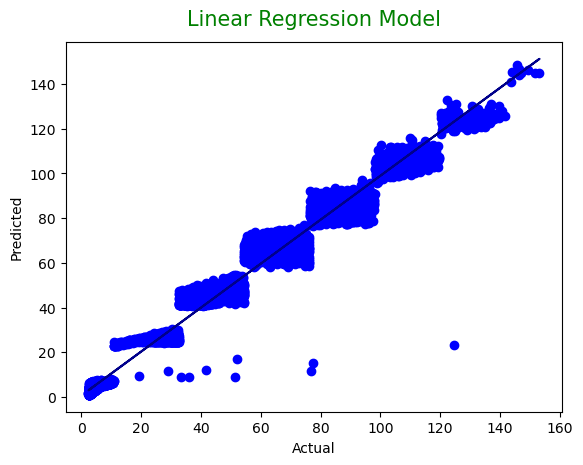

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#visualize model
modele_regression = LinearRegression()
modele_regression.fit(X_train, y_train)
y_pred1 = modele_regression.predict(X_test)
x = y_test
y = y_pred1
plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**h) Let's visualize the Decision Tree model** 

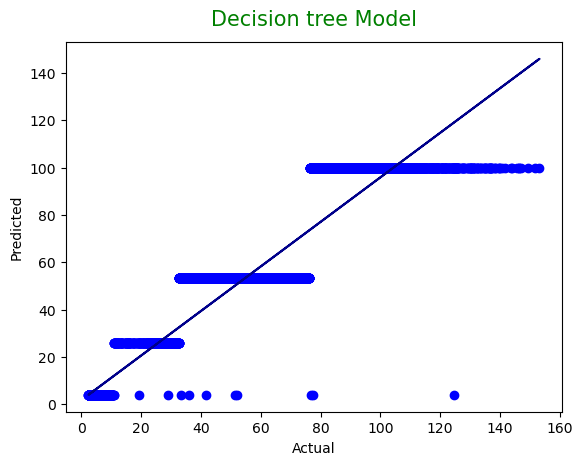

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree

#visualize model
clf = DecisionTreeRegressor(max_depth=2)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
x = y_test
y = y_pred2
plt.title('Decision tree Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**j) You will now test other regression algorithms such as KNN, Random Forest and SVR**

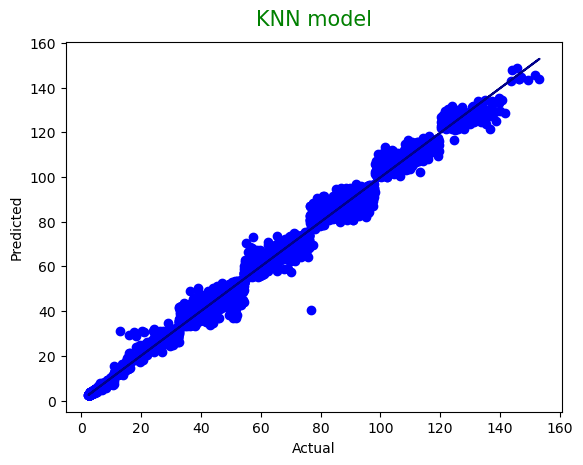

In [87]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
x = y_test
y = y_pred3
plt.title('KNN model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

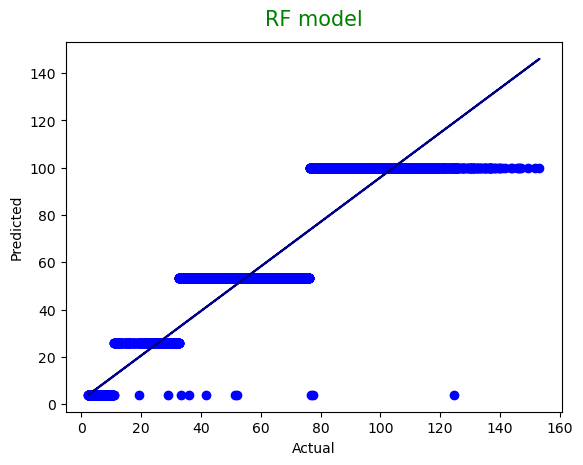

In [88]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred4 = regr.predict(X_test)
x = y_test
y = y_pred4
plt.title('RF model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

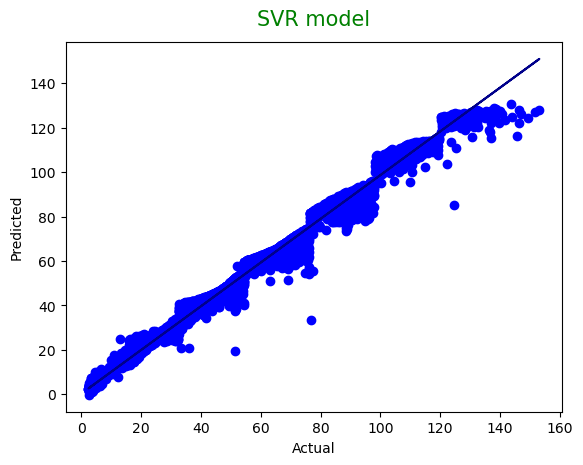

In [89]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(X_train, y_train)
y_pred5 = svr.predict(X_test)
x = y_test
y = y_pred5
plt.title('SVR model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [81]:
#**k) Compare the performance of these models and determine the best model**

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculation of metrics of LR
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred1)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2.5295741193656855
Mean Squared Error (MSE): 17.901529232629432
Root Mean Squared Error (RMSE): 4.231019880906899
R-squared (R2): 0.984050430894492


In [93]:
# Calculation of metrics of DT
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred2)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 4.585356255241247
Mean Squared Error (MSE): 64.5927537464542
Root Mean Squared Error (RMSE): 8.036961723590215
R-squared (R2): 0.9424503585025393


In [94]:
# Calculation of metrics of KNN
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred3)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.8963955479452055
Mean Squared Error (MSE): 3.6757722401911037
Root Mean Squared Error (RMSE): 1.9172303565797992
R-squared (R2): 0.9967250293201669


In [95]:
# Calculation of metrics of RF
mae = mean_absolute_error(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred4)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 4.585515739274538
Mean Squared Error (MSE): 64.59507193875119
Root Mean Squared Error (RMSE): 8.037105942984153
R-squared (R2): 0.9424482930830012


In [96]:
# Calculation of metrics of SVR
mae = mean_absolute_error(y_test, y_pred5)
mse = mean_squared_error(y_test, y_pred5)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred5)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.070321780203522
Mean Squared Error (MSE): 5.788991982815405
Root Mean Squared Error (RMSE): 2.4060324151630637
R-squared (R2): 0.9948422323880101


In [98]:
KNN model has the best results as :
For MAE, KNN has the lowest value (0.896), indicating the smallest average magnitude of errors.
For MSE and RMSE, KNN also has the lowest values (3.676 for MSE and 1.917 for RMSE), indicating smaller errors and more precise predictions.
For R2, KNN again has the highest value (0.997), indicating the best fit of the model to the data.

SyntaxError: invalid syntax (1546828632.py, line 1)

# Iterate!
At this point, you can go back to the previous steps to try to make improvements to the model (consider changing the hyperparameters of the models).


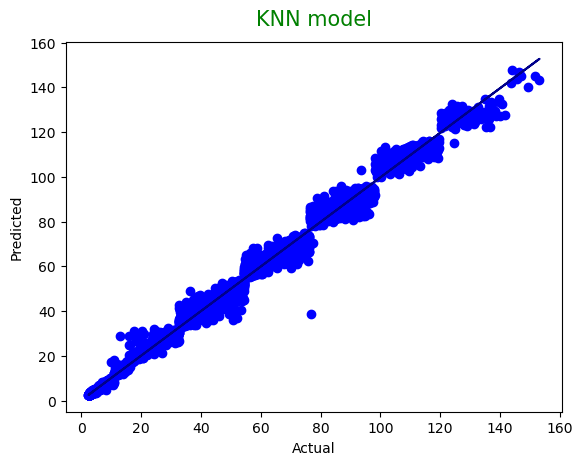

Mean Absolute Error (MAE): 0.9320093226788432
Mean Squared Error (MSE): 3.8242662340182645
Root Mean Squared Error (RMSE): 1.9555731216240073
R-squared (R2): 0.9965927269237894


In [101]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
x = y_test
y = y_pred3
plt.title('KNN model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Calculation of metrics of KNN
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred3)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Exercice 
Using the Diamonds dataset, train a regression algorithm of your choice, which predicts the price of the diamond.
Perform all the preprocessing steps.